In [3]:
import os

paths_64 = {
    '2.0':'results/01-08-2025-depinning/partial/l-128-d0-2.0/',
    '4.0':'results/01-08-2025-depinning/partial/l-128-d0-4.0/',
    '16.0':'results/01-08-2025-depinning/partial/l-128-d0-16.0/',
    '32.0':'results/01-08-2025-depinning/partial/l-128-d0-32.0/',
    '64.0':'results/01-08-2025-depinning/partial/l-128-d0-64.0/'
}
paths_128 = {
    '2':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-128-d0-2.0/',
    '4':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-128-d0-4.0/',
    '16':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-128-d0-16.0/',
    '32':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-128-d0-32.0/',
    '64':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-128-d0-64.0/'
}

paths_64 = {
    '2':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-64-d0-2.0/',
    '4':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-64-d0-4.0/',
    '8':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-64-d0-8.0/',
    '16':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-64-d0-16.0/',
    '32':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-64-d0-32.0/'
}

paths_265 = {
    '2':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-265-d0-2.0/',
    '16':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-265-d0-16.0/',
    '128':'/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-265-d0-128.0/'
}

paths_512 = {
    '8.0' : '/Users/elmerheino/Documents/partial-dislocations/results/01-08-2025-depinning/partial/l-512-d0-8.0/'
}

# for d0, path in paths_128.items():
#     os.system(f'python3 velocityPlots.py velocity_dataset {path}/depinning-pickle-dumps')
#     pass

# for d0, path in paths_128.items():
#     os.system(f'python3 velocityPlots.py depinning_dataset {path}/velocity-datasets')

# for d0, path in paths_128.items():
#     os.system(f'python3 velocityPlots.py depinning_plot {path}/depinning-datasets {path}/plots/depinning')

# for d0, path in paths_512.items():
#     os.system(f'python3 velocityPlots.py hist {path}/velocity-datasets {path}/plots/velocity-history')

for d0, path in paths_265.items():
    os.system(f'python3 velocityPlots.py hist {path}/velocity-datasets {path}/plots/velocity-history')

python3: can't open file '/Users/elmerheino/Documents/partial-dislocations/notebooks/velocityPlots.py': [Errno 2] No such file or directory
python3: can't open file '/Users/elmerheino/Documents/partial-dislocations/notebooks/velocityPlots.py': [Errno 2] No such file or directory
python3: can't open file '/Users/elmerheino/Documents/partial-dislocations/notebooks/velocityPlots.py': [Errno 2] No such file or directory


Text(0.5, 1.0, 'L=512')

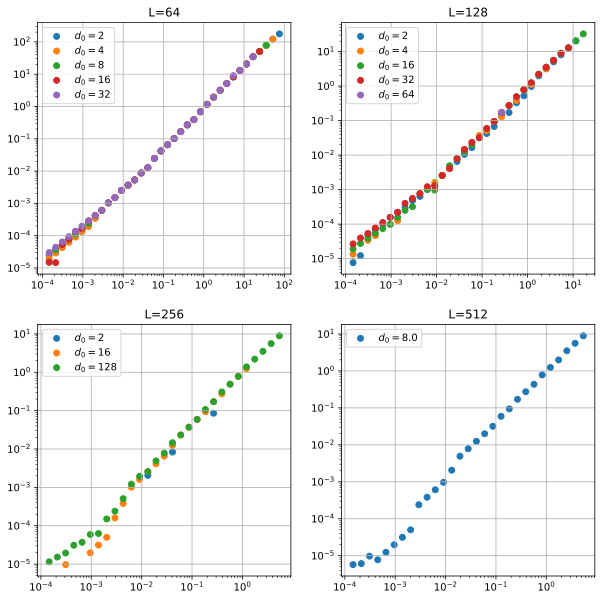

In [4]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_formats = ['svg'] # Use vector graphics

def plot_data_in_path_dict(fig, ax, paths : dict):
    for d0, path_i in paths.items():
        crit_path = Path(path_i).joinpath('critical_forces.csv')
        df = pd.read_csv(crit_path, sep=';', index_col=0)

        ax.scatter(df['noise'], df['critical_force'], label=f"$d_0 = {d0}$")
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.grid(True)
        ax.legend()

fig, axs = plt.subplots(2,2, figsize=(10,10))
axs = axs.flatten()

plot_data_in_path_dict(fig, axs[0], paths_64)
axs[0].set_title("L=64")

plot_data_in_path_dict(fig, axs[1], paths_128)
axs[1].set_title("L=128")

plot_data_in_path_dict(fig, axs[2], paths_265)
axs[2].set_title("L=256")

plot_data_in_path_dict(fig, axs[3], paths_512)
axs[3].set_title("L=512")

Slope: 1.0629372203082355, Intercept: -0.6547256177871894, R-squared: 0.9975766091771854


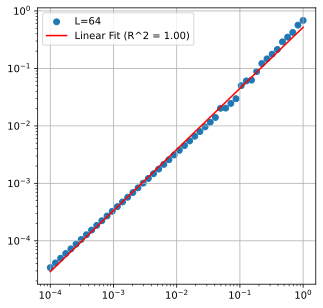

In [6]:
import numpy as np
from scipy.stats import linregress

path_to_csv = "../results/9-9-depinning-FIRE/l-64/simulation_backups/noise_tauc_data_l-64-s-7.csv"
df = pd.read_csv(path_to_csv)
df.columns

# Linear fit
slope, intercept, r_value, p_value, std_err = linregress(np.log(df['deltaR']), np.log(df['tau_c']))
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}")

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(df['deltaR'], df['tau_c'], label=f"L=64")

# Plot the linear fit
x_fit = np.linspace(df['deltaR'].min(), df['deltaR'].max(), 100)
y_fit = np.exp(intercept) * (x_fit**slope)
ax.plot(x_fit, y_fit, color='red', label=f'Linear Fit (R^2 = {r_value**2:.2f})')

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
ax.legend()


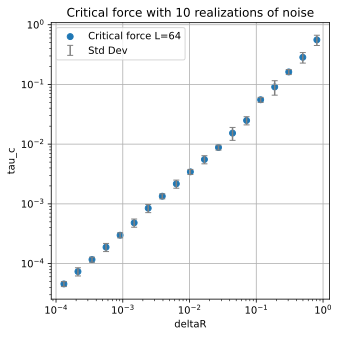

In [7]:
import glob
import pandas as pd
import numpy as np

path_todir = "../results/9-9-depinning-FIRE/l-64/simulation_backups/"

# Find all CSV files in the directory
csv_files = glob.glob(path_todir + "noise_tauc_data_l-64-s-*.csv")

# Read each CSV file into a pandas DataFrame and store in a list
dfs = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Bin the data by deltaR
bins = np.logspace(np.log10(df['deltaR'].min()), np.log10(df['deltaR'].max()), num=20)
df['deltaR_binned'] = pd.cut(df['deltaR'], bins, labels=False)

# Calculate the mean tau_c for each bin
df_binned = df.groupby('deltaR_binned')['tau_c'].mean().reset_index()
bin_centers = (bins[:-1] + bins[1:]) / 2
df_binned['deltaR'] = bin_centers[df_binned['deltaR_binned'].astype(int)]

# Plot the binned data
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df_binned['deltaR'], df_binned['tau_c'], label="Critical force L=64")
# Calculate the standard deviation of tau_c for each bin
df_std = df.groupby('deltaR_binned')['tau_c'].std().reset_index()
df_binned['tau_c_std'] = df_std['tau_c']

# Add error bars to the scatter plot
ax.errorbar(df_binned['deltaR'], df_binned['tau_c'], yerr=df_binned['tau_c_std'], fmt='none', ecolor='gray', capsize=3, label='Std Dev')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('deltaR')
ax.set_ylabel('tau_c')
ax.grid(True)
ax.legend()
plt.title("Critical force with 10 realizations of noise")
plt.show()